<a href="https://colab.research.google.com/github/mesiddhantcodes/DATA-SCIENCE-PWSKILL/blob/main/12_Mar_Ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation
of 5 using Python. Interpret the results.**

In [2]:
import scipy.stats as stats
conf_lvl=.95
std=5
sample_size=100
mean=50
std_error=std/(sample_size**0.5)

#confidence interval
conf_int = stats.norm.interval(conf_lvl, loc=50, scale=std_error)
print("The confidence interval is",conf_int)


The confidence interval is (49.02001800772997, 50.97998199227003)


**Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag
matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20%
brown. Use Python to perform the test with a significance level of 0.05.**

In [3]:
import numpy as np
import scipy.stats as stats
#Observed frequency
obsvd=np.array([22, 18, 20, 9, 11, 20])
#Expected Frequency
expect=np.array([0.2,0.2,0.2,0.1,0.1,0.2])*np.sum(obsvd)
#this function give only the chisquare value and the p value 
chival, p = stats.chisquare(obsvd, f_exp=expect)
aplha=0.05
if p<aplha:
  print("reject the null : The distribution of colors in the bag does not match the expected distribution")
else:
  print("Fail to reject the null Hypothesis")

Fail to rejec the null Hypothesis


Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following
data:

|S.no      |Group A|Group B|
|----------|---------|---------|
|outcome  1|20|15|
|outcome  2|10|25|
|outcome  3|15|20|

In [4]:

import numpy as np
import scipy.stats as stats

# Define the contingency table
cont_table = np.array([[20, 15], [10, 25], [15, 20]])
# Calculate the chi-square statistic and p-value
chi2, p, dof, expected = stats.chi2_contingency(cont_table)

# Compare p-value to the significance level
alpha = 0.05
if p < alpha:
    print("Reject null hypothesis - There is a significant association between Group and Outcome.")
else:
    print("Fail to reject null hypothesis - There is no significant association between Group and Outcome.")

Fail to reject null hypothesis - There is no significant association between Group and Outcome.


**Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals
smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the
population who smoke.**

In [ ]:
import statsmodels.api as sm

# Define the sample size and number of successes (smokers)
n = 500
successes = 60

# Calculate the proportion and standard error
prop = successes / n
se = sm.stats.proportion.std_error(prop, n)
#https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportion_confint.html#statsmodels.stats.proportion.proportion_confint
# Calculate the 95% confidence interval
ci_low, ci_high = sm.stats.proportion.proportion_confint(successes, n, alpha=0.05, method='wilson')
#this finction is used to calculte the confidence interval of binomail propotion
# Print the results
print("Sample proportion: {:.3f}".format(prop))
print("Standard error: {:.3f}".format(se))
print("95% Confidence interval: [{:.3f}, {:.3f}]".format(ci_low, ci_high))

**Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.**

In [10]:
import numpy as np
import scipy.stats as stats

mean=75
n=100
std=12
std_error=std/np.sqrt(n)


ci_low,ci_high=stats.norm.interval(0.9, loc=mean, scale=std_error)
print("Sample mean: {:.3f}".format(mean))
print("Standard error: {:.3f}".format(std_error))
print("90% Confidence interval: [{:.3f}, {:.3f}]".format(ci_low, ci_high))


Sample mean: 75.000
Standard error: 1.200
90% Confidence interval: [73.026, 76.974]


**Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.**

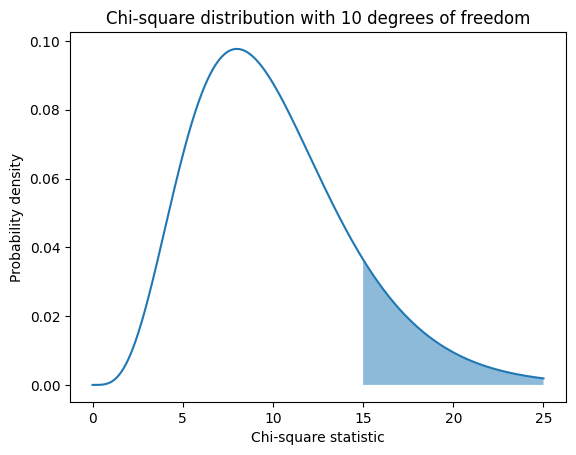

In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
df=10
# Define the x range for the plot
x = np.linspace(0, 25, 1000)

# Calculate the y values (PDF) for the chi-square distribution
y = stats.chi2.pdf(x, df)

# Plot the chi-square distribution
fig, ax = plt.subplots()
ax.plot(x, y)

# Shade the area corresponding to a chi-square statistic of 15
x_shade = np.linspace(15, 25, 1000)
y_shade = stats.chi2.pdf(x_shade, df)
ax.fill_between(x_shade, y_shade, 0, alpha=0.5)

# Add labels to the axes and the plot title
ax.set_xlabel("Chi-square statistic")
ax.set_ylabel("Probability density")
ax.set_title("Chi-square distribution with {} degrees of freedom".format(df))

# Show the plot
plt.show()

     



**Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.**

In [17]:
import scipy.stats as stats
import numpy as np
n=1000
x=520
#sample poropotion and sample eror
#We can estimate σ using the sample standard deviation √p(1-p) (i.e., the standard deviation of a Bernouilli distribution)
sam_por=n/x
satd_error = np.sqrt((sam_por * (1 - sam_por)) / n)
# Calculate the z-score corresponding to a 99% confidence level
z = stats.norm.ppf(0.995)

# Calculate the confidence interval
lower = sam_por - z * sam_por
upper = sam_por + z * sam_por

# Print the confidence interval
print("The 99% confidence interval for the true proportion of people who prefer Coke is ({:.3f}, {:.3f}).".format(lower, upper))



The 99% confidence interval for the true proportion of people who prefer Coke is (-3.030, 6.877).


<ipython-input-17-35b74c530547>:8: RuntimeWarning: invalid value encountered in sqrt
  satd_error = np.sqrt((sam_por * (1 - sam_por)) / n)


**Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.**

In [18]:

import numpy as np
import scipy.stats as stats

# Define the observed frequency of tails
observed = 45

# Set the significance level and degrees of freedom
alpha = 0.05
df = 1

# Calculate the critical value
critical_value = stats.chi2.ppf(1 - alpha, df)

# Calculate the expected frequency of tails
expected = 50

# Calculate the chi-square statistic
chi2 = (observed - expected)**2 / expected

# Compare the chi-square statistic to the critical value and interpret the results
if chi2 > critical_value:
    print("We reject the null hypothesis and conclude that the coin is biased towards tails.")
else:
    print("We fail to reject the null hypothesis and conclude that the coin is fair.")

We fail to reject the null hypothesis and conclude that the coin is fair.


**Q9. A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis.**

In [19]:

import numpy as np
from scipy.stats import chi2_contingency

observed = np.array([ [60, 140], [30, 170]])

chi2, pval, dof, expected = chi2_contingency(observed)

print("Chi-square statistic:", chi2)
print("p-value:", pval)
print("Degrees of freedom:", dof)


Chi-square statistic: 12.057347670250895
p-value: 0.0005158863863703744
Degrees of freedom: 1


**Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin.**


In [21]:
import numpy as np
from scipy.stats import chi2_contingency

observed = np.array([[120, 250, 130], [100, 300, 100]])

chi2, pval, dof, expected = chi2_contingency(observed)

print("Chi-square statistic:", chi2)
print("p-value:", pval)
print("Degrees of freedom:", dof)


Chi-square statistic: 10.276679841897234
p-value: 0.005867422017280105
Degrees of freedom: 2
